#  1. Image Filtering
We want to apply Filters to our images and see if different applied filters have an influence on  the success of our clustering

## 1.1 Gauß Filter

A **Gaussian filter** is used to blur (smooth) an image by reducing noise and detail. It works by ittrereting over every pixel a small matrix (kernel) whose values follow a 2D Gaussian (bell-curve) distribution:

- **Kernel shape**: A square grid (e.g. 3×3, 5×5) where the center has the highest weight and the weights fall off towards the edges.
- **Convolution**: For each pixel, multiply the surrounding pixels by the corresponding kernel weights and sum them up. This replaces the original pixel with a weighted average of its neighborhood.
- **σ (sigma)**: Controls the “spread” of the bell curve. A larger σ produces stronger blurring (more smoothing), while a smaller σ keeps more detail.
- **Benefits**:  
  - Smooths away high-frequency noise  
  - Preserves overall image structure  
  - Often used as a preprocessing step for edge detection or image enhancement

Mathematically, the 2D Gaussian kernel is defined as:

$$
G(x, y) = \frac{1}{2 \pi \sigma^2} \exp\!\Bigl(-\frac{x^2 + y^2}{2 \sigma^2}\Bigr)
$$

where \(x\) and \(y\) are the horizontal and vertical distances from the kernel center.


In [ ]:
# Import Required Libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt


In [158]:
# Import custom functions
from Functions.Datenvorbereitung import apply_gaussian_filter 
from Functions.Datenvorbereitung import display






ImportError: cannot import name 'display' from 'Functions.Datenvorbereitung' (/Users/david/Uni_Lokal/topic01_team04/Code/Functions/Datenvorbereitung.py)

### Load Original Images


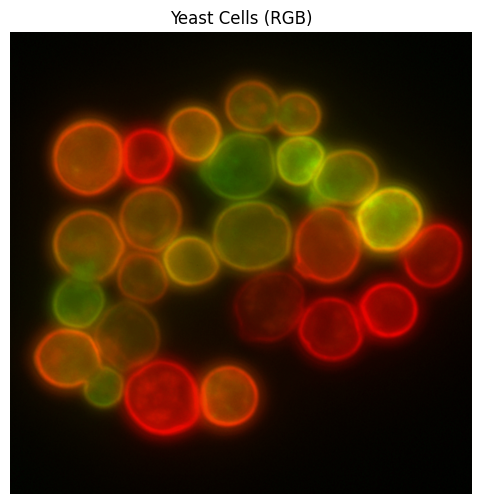

In [29]:
YeastCells = np.copy(plt.imread('Original_Images/Clustering/Data/Yeast_Cells.jpg'))

# Bild anzeigen ohne Achsen
plt.figure(figsize=(8, 6))
plt.imshow(YeastCells)
plt.axis('off')  # Achsen ausblenden
plt.title("Yeast Cells (RGB)")
plt.show()

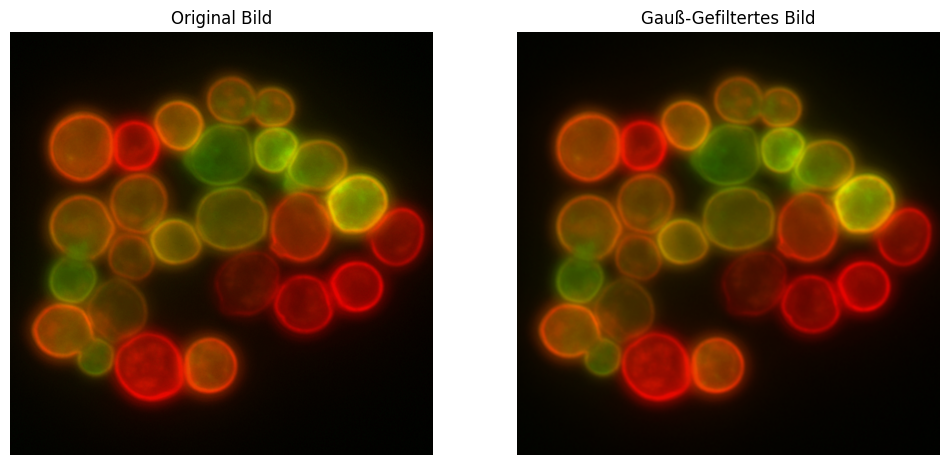

In [136]:

def apply_gaussian_filter(input_path, kernel_size=5):
    """
    Wende Gauß-Filter auf ein Bild an und zeige es in Jupyter an
    
    Parameter:
    input_path (str): Pfad zum Eingangsbild
    kernel_size (int): Größe des Filterkerns (muss ungerade sein)
    """
    # Bild im RGB-Format laden
    image = cv2.imread(input_path)
    
    if image is None:
        print(f"Fehler: Bild konnte nicht geladen werden: {input_path}")
        return None
    
    # Konvertierung von BGR (OpenCV) zu RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Gauß-Filter anwenden
    if kernel_size % 2 == 0:  # Sicherstellen, dass Kernel ungerade ist
        kernel_size += 1
    blurred = cv2.GaussianBlur(image_rgb, (kernel_size, kernel_size), 0)
    
    return image_rgb, blurred

def display_images(original, filtered):
    """Zeige Original und gefiltertes Bild nebeneinander"""
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Bild')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(filtered)
    plt.title('Gauß-Gefiltertes Bild')
    plt.axis('off')
    
    plt.show()

# HIER DEN BILDPFAD EINTRAGEN ################################
input_path = "Original_Images/Clustering/Data/Yeast_Cells.jpg"  # <-- HIER ANPASSEN
kernel_size = 7  # Ungerade Zahl: 3,5,7,...
##############################################################

# Bild verarbeiten und anzeigen
original, filtered = apply_gaussian_filter(input_path, kernel_size)

if original is not None:
    display_images(original, filtered)
else:
    print("Bildverarbeitung fehlgeschlagen")




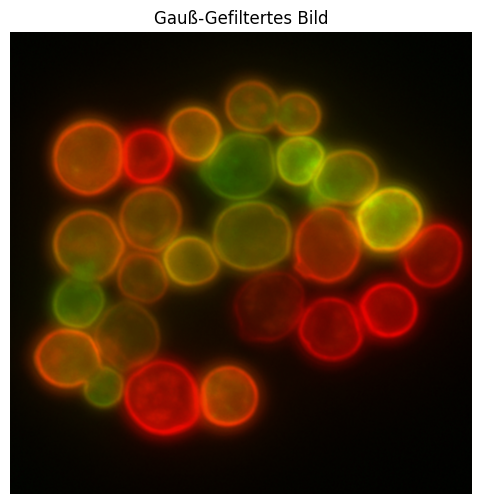

In [139]:
input_path = "Original_Images/Clustering/Data/Yeast_Cells.jpg"  
kernel_size = 5

x = apply_gaussian_filter(input_path, kernel_size)
blurred_image = x[1]  # Access the second element of the tuple

plt.figure(figsize=(8, 6))  # Set the figure size before plotting
plt.imshow(blurred_image)
plt.title('Gauß-Gefiltertes Bild')
plt.axis('off')
plt.show()
